In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import cm

In [3]:
'''DATA PRE-PROCESS'''


df = pd.read_csv("WineQT.csv")
print(df)
#drop the un-related row that marked the id of the wine
dfy = df['quality']
#drop the un-related and target rows
dfX = df.drop(columns = ["Id","quality"])

oversampler = RandomOverSampler(random_state = 42,sampling_strategy = {3:350,4:370,7:420})

def max_abs_scale(df):
    # copy the dataframe
    df_scaled = df.copy()
    # apply maximum absolute scaling
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled

#normalize the data based on the maximum absolute value scaling
dfX = max_abs_scale(dfX)

X_resampled, y_resampled = oversampler.fit_resample(dfX, dfy)

#convert pandas dataframe to numpy array
X = X_resampled.to_numpy()
y = y_resampled.to_numpy()

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

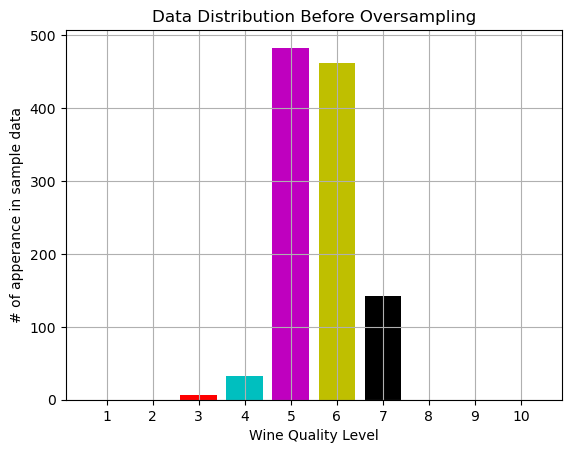

In [86]:
#bar diagram of sample distribution before resample
x_axis = [str(x) for x in range(1,11)]
y_axis = []
for i in range(1,11):
    count = 0
    for j in dfy.to_numpy():
        if j == i:
            count += 1
    y_axis.append(count)
    
colorstring = 'bgrcmykw'
colors = ['b','g','r','c','m','y','k','w']

plt.bar(x_axis,y_axis, color = colors)
plt.title('Data Distribution Before Oversampling')
plt.xlabel('Wine Quality Level')
plt.ylabel("# of apperance in sample data")
plt.grid(True)
plt.show()

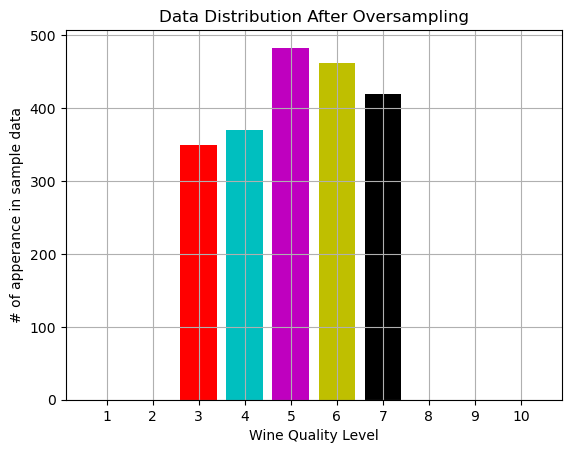

In [4]:
#bar diagram of sample distribution after resample
x_axis = [str(x) for x in range(1,11)]
y_axis = []
for i in range(1,11):
    count = 0
    for j in y:
        if j == i:
            count += 1
    y_axis.append(count)

colorstring = 'bgrcmykw'
colors = ['b','g','r','c','m','y','k','w']

plt.bar(x_axis,y_axis, color = colors)
plt.title('Data Distribution After Oversampling')
plt.xlabel('Wine Quality Level')
plt.ylabel("# of apperance in sample data")
plt.grid(True)
plt.show()

In [5]:
#split training, validation, and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,   
    test_size = 0.07, random_state=10, shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, 
    test_size = 0.07, random_state=10, shuffle=True
)

In [50]:

def weight_SVM(C=0.1,kernel = 'linear',degree = 2):
    svm = SVC(C=C,kernel = kernel, degree = degree)
    #svm = SGDClassifier(loss=loss, random_state=42, penalty = None, learning_rate = 'constant',eta0 = learning_rate,alpha = alpha, max_iter = max_iter)
    svm.fit(X_train,y_train)
    return svm.coef_

In [83]:
def test_SVM(X,y, C=0.1,kernel = 'linear',degree = 2):
    svm = SVC(C=C,kernel = kernel, degree = degree)
    #svm = SGDClassifier(loss=loss, random_state=42, penalty = None, learning_rate = 'constant',eta0 = learning_rate,alpha = alpha, max_iter = max_iter)
    svm.fit(X_train,y_train)
    
    #validation scores
    y_pred = svm.predict(X)
    recall_micro = recall_score(y,y_pred, average='macro')
    print('recall_macro',recall_micro)
    
    f1_micro = f1_score(y,y_pred, average='macro')
    print('f1_macro',f1_micro)
    
    precision_micro = precision_score(y,y_pred, average='macro')
    print('precision_macro',precision_micro)
    
    accuracy_micro = accuracy_score(y,y_pred)
    print('accuracy_macro',accuracy_micro)
    
    f1_micro = f1_score(y,y_pred,average='macro')
    return accuracy_micro

In [84]:
# Without any tuning. SVM
print("Training Score")
result_None_train = test_SVM(X_train,y_train)
print("Validation Score")
result_None_val = test_SVM(X_val,y_val)

Training Score
recall_macro 0.3008318862326196
f1_macro 0.23962595172799453
precision_macro 0.30437358123504743
accuracy_macro 0.3838105726872247
Validation Score
recall_macro 0.28096225243055056
f1_macro 0.20890650681760303
precision_macro 0.2928479143595422
accuracy_macro 0.35036496350364965


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:

# Try different degrees of polynomial tranformation
degree_val = []
degree_train = []
for i in range(2,13):
    poly = PolynomialFeatures(3)
    print("*Polynomial of Degree:",i)
    print("Training Result:")
    poly_train = test_SVM(X_train,y_train,kernel = 'poly',degree = i)
    print("Validation Result:")
    poly_val = test_SVM(X_val,y_val,degree = i,kernel = 'poly')
    print('------'*4)
    degree_val.append(poly_val)
    degree_train.append(poly_train)

*Polynomial of Degree: 2
Training Result:
recall_macro 0.44558391880949505
f1_macro 0.4381327824635919
precision_macro 0.44258335152371747
accuracy_macro 0.5324889867841409
Validation Result:
recall_macro 0.41918860757921705
f1_macro 0.3939121519213052
precision_macro 0.43139505593773886
accuracy_macro 0.48175182481751827
------------------------
*Polynomial of Degree: 3
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.4848807964207295
f1_macro 0.48052383058518977
precision_macro 0.48542120390169213
accuracy_macro 0.5754405286343612
Validation Result:
recall_macro 0.43120577001204596
f1_macro 0.41448415378759856
precision_macro 0.43146950830140485
accuracy_macro 0.5036496350364964
------------------------
*Polynomial of Degree: 4
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.5215877579951002
f1_macro 0.5153380712266228
precision_macro 0.5140752624944663
accuracy_macro 0.6139867841409692
Validation Result:
recall_macro 0.4938788598556762
f1_macro 0.47890726707060943
precision_macro 0.49113996242619434
accuracy_macro 0.583941605839416
------------------------
*Polynomial of Degree: 5
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.5595389214926276
f1_macro 0.5575309565366461
precision_macro 0.55766817205691
accuracy_macro 0.6585903083700441
Validation Result:
recall_macro 0.534876147796937
f1_macro 0.5253873455736809
precision_macro 0.5398860398860399
accuracy_macro 0.635036496350365
------------------------
*Polynomial of Degree: 6
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.63222842219217
f1_macro 0.6342293503709152
precision_macro 0.7771790430660862
accuracy_macro 0.7268722466960352
Validation Result:
recall_macro 0.5754768152051684
f1_macro 0.5585288234224405
precision_macro 0.5625340057541858
accuracy_macro 0.6861313868613139
------------------------
*Polynomial of Degree: 7
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.7014695550911129
f1_macro 0.7232374776400105
precision_macro 0.819061316749884
accuracy_macro 0.7720264317180616
Validation Result:
recall_macro 0.6358542985028554
f1_macro 0.61861792506399
precision_macro 0.6215124389676819
accuracy_macro 0.7445255474452555
------------------------
*Polynomial of Degree: 8
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.7677266822391607
f1_macro 0.7883281090734843
precision_macro 0.8313753669411216
accuracy_macro 0.8133259911894273
Validation Result:
recall_macro 0.6136297488589509
f1_macro 0.5842420295003882
precision_macro 0.5945733279066612
accuracy_macro 0.708029197080292
------------------------
*Polynomial of Degree: 9
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.807909829795372
f1_macro 0.8331614771098881
precision_macro 0.8830444295212648
accuracy_macro 0.8502202643171806
Validation Result:
recall_macro 0.6779360424521714
f1_macro 0.6515693720888716
precision_macro 0.6603733815115929
accuracy_macro 0.781021897810219
------------------------
*Polynomial of Degree: 10
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.8821063164221513
f1_macro 0.8989812947796829
precision_macro 0.9231365328766036
accuracy_macro 0.901431718061674
Validation Result:
recall_macro 0.6751221896383187
f1_macro 0.6530517226631936
precision_macro 0.6588049095607235
accuracy_macro 0.781021897810219
------------------------
*Polynomial of Degree: 11
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.9460421276944513
f1_macro 0.9404291514060298
precision_macro 0.9352535950263735
accuracy_macro 0.9289647577092511
Validation Result:
recall_macro 0.7007750314201927
f1_macro 0.6881388268431458
precision_macro 0.6977184637068358
accuracy_macro 0.8175182481751825
------------------------
*Polynomial of Degree: 12
Training Result:
recall_macro 0.9675522224954238
f1_macro 0.9623713824667482
precision_macro 0.9576231859055442
accuracy_macro 0.9570484581497798
Validation Result:
recall_macro 0.6871037564585952
f1_macro 0.6735808792146821
precision_macro 0.6687542087542088
accuracy_macro 0.7956204379562044
------------------------


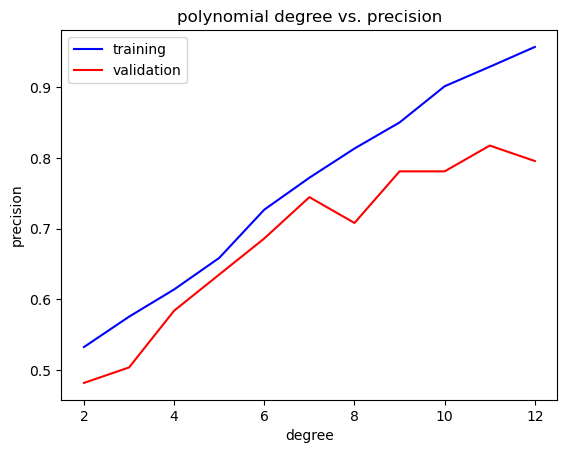

In [31]:
#plot the change in validation and training score with respect to different regulation strength
plt.plot([i for i in range(2,13)], degree_train,label = "training",color ='b')
plt.plot([i for i in range(2,13)],degree_val,label = "validation",color = "r")
plt.xlabel("degree")
plt.ylabel("precision")
plt.title("polynomial degree vs. precision")
plt.legend()
plt.show()

In [27]:
#try RBF kernel
print("RBF")
print("Training Result:")
result_rbf = test_SVM(X_train,y_train,kernel = 'rbf')
print("Validation Result:")
result_rbf = test_SVM(X_val,y_val,kernel = 'rbf')
    

RBF
Training Result:
recall_micro 0.5099118942731278
f1_micro 0.5099118942731278
precision_micro 0.5099118942731278
accuracy_micro 0.5099118942731278
Validation Result:
recall_micro 0.43795620437956206
f1_micro 0.43795620437956206
precision_micro 0.43795620437956206
accuracy_micro 0.43795620437956206


In [28]:
#try sigmoid kernel
#try sigmoid kernel
print("sigmoid")
print("Training Result:")
result_sig = test_SVM(X_train,y_train,kernel = 'sigmoid')
print("Validation Result:")
result_sig = test_SVM(X_val,y_val,kernel = 'sigmoid')

sigmoid
Training Result:
recall_micro 0.22852422907488987
f1_micro 0.22852422907488987
precision_micro 0.22852422907488987
accuracy_micro 0.22852422907488987
Validation Result:
recall_micro 0.25547445255474455
f1_micro 0.25547445255474455
precision_micro 0.25547445255474455
accuracy_micro 0.25547445255474455


In [37]:
#Use the best performed polynomial model, 
# Polynomial to the 8th degree
# Tune Regulation constant

C_s = [0.001,0.005,0.1,0.5,1,5,10,15,20,30,50,80]
C_score_poly_train = []
C_score_poly_val = []
SVM_weight = []
for i in C_s:
    print("C =", i)
    print("Training Result:")
    result_poly_train = test_SVM(X_train,y_train,kernel = 'poly',degree = 7, C= i)
    C_score_poly_train.append(result_poly_train)
    print("Validation Result:")
    result_poly_val = test_SVM(X_val,y_val,kernel = 'poly',degree = 7, C=i)
    C_score_poly_val.append(result_poly_val)
    

C = 0.001
Training Result:
recall_micro 0.5969162995594713
f1_micro 0.5969162995594713
precision_micro 0.5969162995594713
accuracy_micro 0.5969162995594713
Validation Result:
recall_micro 0.5255474452554745
f1_micro 0.5255474452554745
precision_micro 0.5255474452554745
accuracy_micro 0.5255474452554745
C = 0.005
Training Result:
recall_micro 0.6618942731277533
f1_micro 0.6618942731277533
precision_micro 0.6618942731277533
accuracy_micro 0.6618942731277533
Validation Result:
recall_micro 0.6204379562043796
f1_micro 0.6204379562043796
precision_micro 0.6204379562043796
accuracy_micro 0.6204379562043796
C = 0.1
Training Result:
recall_micro 0.7720264317180616
f1_micro 0.7720264317180616
precision_micro 0.7720264317180616
accuracy_micro 0.7720264317180616
Validation Result:
recall_micro 0.7445255474452555
f1_micro 0.7445255474452555
precision_micro 0.7445255474452555
accuracy_micro 0.7445255474452555
C = 0.5
Training Result:
recall_micro 0.8111233480176211
f1_micro 0.8111233480176211
preci

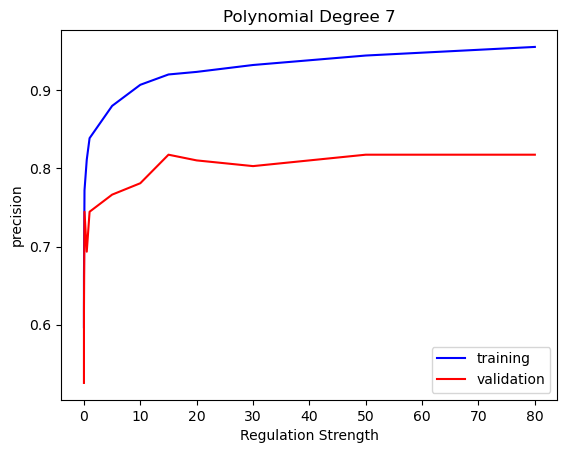

In [38]:
#plot the change in validation and training score with respect to different regulation strength
plt.plot(C_s, C_score_poly_train,label = "training",color ='b')
plt.plot(C_s,C_score_poly_val,label = "validation",color = "r")
plt.xlabel("Regulation Strength")
plt.ylabel("precision")
plt.title('Polynomial Degree 7')
plt.legend()
plt.show()

In [86]:
# Use the RBF kernel
# Tune Regulation constant

C_s = [0.001,0.005,0.1,0.5,1,5,10,15,20,30,50,80]
C_score_rbf_train = []
C_score_rbf_val = []
SVM_weight = []
for i in C_s:
    print("C =", i)
    print("Training Result:")
    result_rbf_train = test_SVM(X_train,y_train,kernel = 'rbf', C= i)
    C_score_rbf_train.append(result_rbf_train)
    print("Validation Result:")
    result_rbf_val = test_SVM(X_val,y_val,kernel = 'rbf', C=i)
    C_score_rbf_val.append(result_rbf_val)

C = 0.001
Training Result:
recall_macro 0.16666666666666666
f1_macro 0.06200507993425967
precision_macro 0.03808737151248164
accuracy_macro 0.22852422907488987
Validation Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.16666666666666666
f1_macro 0.06782945736434108
precision_macro 0.04257907542579076
accuracy_macro 0.25547445255474455
C = 0.005
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.16666666666666666
f1_macro 0.06200507993425967
precision_macro 0.03808737151248164
accuracy_macro 0.22852422907488987
Validation Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.16666666666666666
f1_macro 0.06782945736434108
precision_macro 0.04257907542579076
accuracy_macro 0.25547445255474455
C = 0.1
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.42877727044733893
f1_macro 0.4160604067505715
precision_macro 0.44452935838192625
accuracy_macro 0.5099118942731278
Validation Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.38812671531189186
f1_macro 0.34269765231201027
precision_macro 0.394558682058682
accuracy_macro 0.43795620437956206
C = 0.5
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.4819430966420228
f1_macro 0.4770416345120135
precision_macro 0.48828292236657284
accuracy_macro 0.5704845814977973
Validation Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.44680157771311685
f1_macro 0.42580524938680964
precision_macro 0.4650907209730739
accuracy_macro 0.5109489051094891
C = 1
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.5038571491103997
f1_macro 0.5006186730373833
precision_macro 0.5110608374112803
accuracy_macro 0.5963656387665198
Validation Result:
recall_macro 0.4662934893102915
f1_macro 0.4435827031540019
precision_macro 0.4793780822058695
accuracy_macro 0.5328467153284672
C = 5
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.5407690682702141
f1_macro 0.5356833271938138
precision_macro 0.5324773540163633
accuracy_macro 0.6349118942731278
Validation Result:
recall_macro 0.5104521846632964
f1_macro 0.49714297688799164
precision_macro 0.5075746099075897
accuracy_macro 0.5985401459854015
C = 10
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.5565809262463363
f1_macro 0.5527322773791559
precision_macro 0.5508142285728682
accuracy_macro 0.6541850220264317
Validation Result:
recall_macro 0.5253523382731276
f1_macro 0.5152180238304197
precision_macro 0.526305106660596
accuracy_macro 0.6204379562043796
C = 15
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.5920725521132147
f1_macro 0.5845162466029644
precision_macro 0.5813047119583864
accuracy_macro 0.6921806167400881
Validation Result:
recall_macro 0.5814675986153066
f1_macro 0.5734945815380598
precision_macro 0.579695654907879
accuracy_macro 0.6934306569343066
C = 20
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.6027184520394503
f1_macro 0.5953876692618026
precision_macro 0.5911457194556848
accuracy_macro 0.704295154185022
Validation Result:
recall_macro 0.5794868402678249
f1_macro 0.5674487720336037
precision_macro 0.5699490662139218
accuracy_macro 0.6861313868613139
C = 30
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.6213111305767286
f1_macro 0.6135295002134825
precision_macro 0.6089173840882767
accuracy_macro 0.7257709251101322
Validation Result:
recall_macro 0.5882587700923865
f1_macro 0.5732191797934735
precision_macro 0.5753435086155675
accuracy_macro 0.6934306569343066
C = 50
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.6238864232439965
f1_macro 0.6170689261346229
precision_macro 0.6130171759393651
accuracy_macro 0.7290748898678414
Validation Result:
recall_macro 0.5882587700923865
f1_macro 0.5721544715447154
precision_macro 0.5741057847760994
accuracy_macro 0.6934306569343066
C = 80
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.6470732060896648
f1_macro 0.6503550056578776
precision_macro 0.7926600865147034
accuracy_macro 0.7444933920704846
Validation Result:
recall_macro 0.5930206748542912
f1_macro 0.5778129395218002
precision_macro 0.5806538233008821
accuracy_macro 0.7007299270072993


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


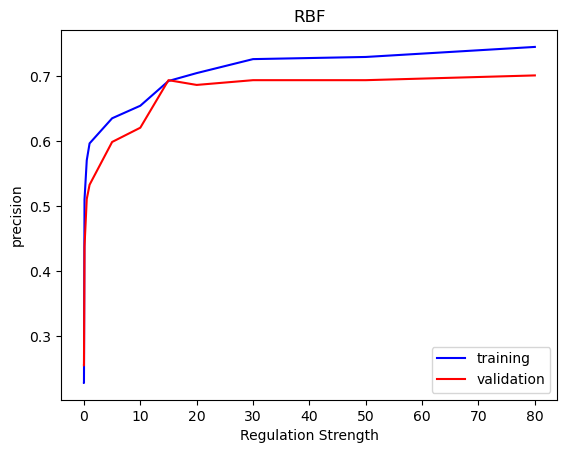

In [87]:
#plot the change in validation and training score with respect to different regulation strength
plt.plot(C_s, C_score_rbf_train,label = "training",color ='b')
plt.plot(C_s,C_score_rbf_val,label = "validation",color = "r")
plt.xlabel("Regulation Strength")
plt.ylabel("precision")
plt.title('RBF')
plt.legend()
plt.show()

In [88]:
# Use the linear kernel
# Tune Regulation constant

C_s = [0.001,0.005,0.1,0.5,1,5,10,15,20,30,50,80]
C_score_lin_train = []
C_score_lin_val = []
SVM_weight = []
for i in C_s:
    print("C =", i)
    print("Training Result:")
    result_lin_train = test_SVM(X_train,y_train,kernel = 'linear', C= i)
    C_score_lin_train.append(result_lin_train)
    print("Validation Result:")
    result_lin_val = test_SVM(X_val,y_val,kernel = 'linear', C=i)
    C_score_lin_val.append(result_lin_val)

C = 0.001
Training Result:
recall_macro 0.16666666666666666
f1_macro 0.06200507993425967
precision_macro 0.03808737151248164
accuracy_macro 0.22852422907488987
Validation Result:
recall_macro 0.16666666666666666
f1_macro 0.06782945736434108
precision_macro 0.04257907542579076
accuracy_macro 0.25547445255474455
C = 0.005
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.16666666666666666
f1_macro 0.06200507993425967
precision_macro 0.03808737151248164
accuracy_macro 0.22852422907488987
Validation Result:
recall_macro 0.16666666666666666
f1_macro 0.06782945736434108
precision_macro 0.04257907542579076
accuracy_macro 0.25547445255474455
C = 0.1
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.3008318862326196
f1_macro 0.23962595172799453
precision_macro 0.30437358123504743
accuracy_macro 0.3838105726872247
Validation Result:
recall_macro 0.28096225243055056
f1_macro 0.20890650681760303
precision_macro 0.2928479143595422
accuracy_macro 0.35036496350364965
C = 0.5
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.4358646864378315
f1_macro 0.4289337545739167
precision_macro 0.4313273835470636
accuracy_macro 0.5192731277533039
Validation Result:
recall_macro 0.4055173326176195
f1_macro 0.38361964474259597
precision_macro 0.40968146171881314
accuracy_macro 0.45985401459854014
C = 1
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.4695009744116046
f1_macro 0.46271810695784527
precision_macro 0.4621852308326866
accuracy_macro 0.5572687224669604
Validation Result:
recall_macro 0.399957929001896
f1_macro 0.3847009866686751
precision_macro 0.39588840614248966
accuracy_macro 0.46715328467153283
C = 5
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.5096744943964879
f1_macro 0.4982661602893384
precision_macro 0.4946458564218073
accuracy_macro 0.5974669603524229
Validation Result:
recall_macro 0.4680073629315477
f1_macro 0.45037721830357486
precision_macro 0.45275138260432374
accuracy_macro 0.5547445255474452
C = 10
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.5072524337047414
f1_macro 0.4961782955087812
precision_macro 0.49163253857817607
accuracy_macro 0.5958149779735683
Validation Result:
recall_macro 0.47937449042770747
f1_macro 0.47042562497135526
precision_macro 0.4702204282848829
accuracy_macro 0.5693430656934306
C = 15
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.5297649099800562
f1_macro 0.511850309895208
precision_macro 0.5074417315641121
accuracy_macro 0.6183920704845814
Validation Result:
recall_macro 0.5301134066838652
f1_macro 0.5183248086925686
precision_macro 0.5159844449699522
accuracy_macro 0.635036496350365
C = 20
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.5333400523864164
f1_macro 0.5154206207210034
precision_macro 0.5107827244087669
accuracy_macro 0.6222466960352423
Validation Result:
recall_macro 0.5287470876605003
f1_macro 0.514141515293589
precision_macro 0.5087149596953519
accuracy_macro 0.6277372262773723
C = 30
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.5353952117995793
f1_macro 0.5175896185548784
precision_macro 0.5130181551934913
accuracy_macro 0.625
Validation Result:
recall_macro 0.5253515019219602
f1_macro 0.5114405520084954
precision_macro 0.5057141765088101
accuracy_macro 0.6277372262773723
C = 50
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.5357496909406333
f1_macro 0.5180215439997066
precision_macro 0.5132628177045763
accuracy_macro 0.6255506607929515
Validation Result:
recall_macro 0.5253515019219602
f1_macro 0.5116864176003961
precision_macro 0.5039249495771235
accuracy_macro 0.6277372262773723
C = 80
Training Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall_macro 0.5282948716635248
f1_macro 0.5107185331994707
precision_macro 0.5060213258305519
accuracy_macro 0.6172907488986784
Validation Result:
recall_macro 0.5301134066838652
f1_macro 0.5195061728395062
precision_macro 0.5150104766256487
accuracy_macro 0.635036496350365


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


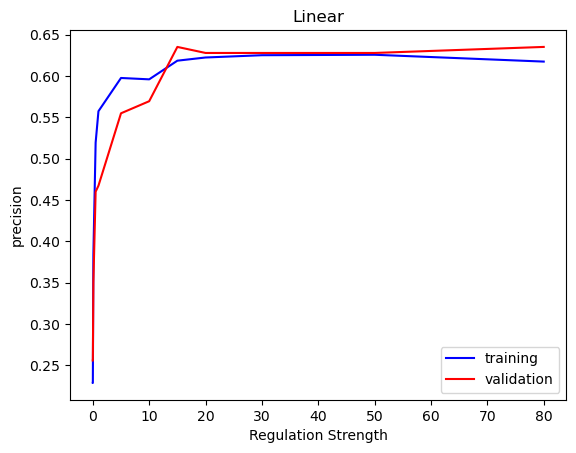

In [89]:
#plot the change in validation and training score with respect to different regulation strength
plt.plot(C_s, C_score_lin_train,label = "training",color ='b')
plt.plot(C_s,C_score_lin_val,label = "validation",color = "r")
plt.xlabel("Regulation Strength")
plt.ylabel("precision")
plt.title('Linear')
plt.legend()
plt.show()

In [90]:
# plot the weight changes
SVM_weight = []
for i in C_s:
    print("C =", i)
    print("Training Result:")
    weights = weight_SVM(kernel = 'linear', C= i)
    SVM_weight.append(weights)

all_w_svm = []

for j in range(len(SVM_weight[0][0])):
    all_w_j = []
    for i in range(len(SVM_weight)):
        all_w_j.append(SVM_weight[i][0][j])
    all_w_svm.append(all_w_j)

C = 0.001
Training Result:
C = 0.005
Training Result:
C = 0.1
Training Result:
C = 0.5
Training Result:
C = 1
Training Result:
C = 5
Training Result:
C = 10
Training Result:
C = 15
Training Result:
C = 20
Training Result:
C = 30
Training Result:
C = 50
Training Result:
C = 80
Training Result:


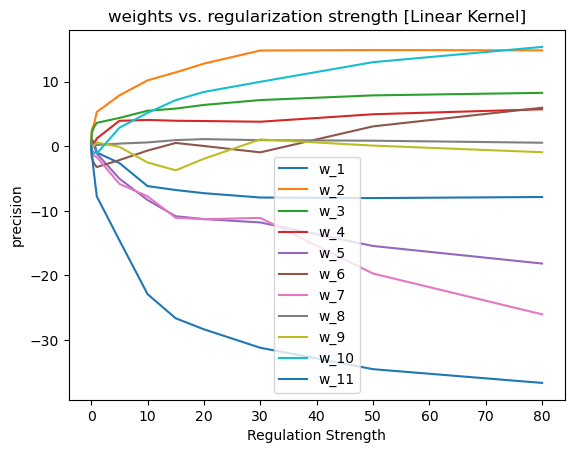

In [91]:
color = iter(cm.rainbow(np.linspace(0, 1, 200)))

for w in range(len(all_w_svm)):
    c = next(color)
    label_value = 'w_'+str(w+1)
        #plot the change in feature weights with respect to different regulation strength
    plt.plot(C_s,all_w_svm[w], label = label_value)
plt.legend()
plt.xlabel("Regulation Strength")
plt.ylabel("precision")
plt.title("weights vs. regularization strength [Linear Kernel]")
plt.show()

In [92]:
# Test result SVM
# degree = 5
# regularization = 15

result_final =  test_SVM(X_test,y_test,kernel = 'poly',degree=7, C= 15)


recall_macro 0.6754839363535016
f1_macro 0.672119865271461
precision_macro 0.6697871572871573
accuracy_macro 0.777027027027027


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
print('The test score of SVM is:',result_final)

The test score of SVM is: 0.777027027027027
